In [1]:
import numpy as np
import pandas as pd
import struct
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set_style('darkgrid')
import sys

In [2]:
def wigner(x):
    return 32/math.pi/math.pi*x*x*np.exp(-4/math.pi*x*x)
    #return np.exp(-4/math.pi*x)

In [3]:
def spacing_make(arr):
    spacing = []
    arr.sort()
    for i in range(len(arr)-1):
        spacing.append(arr[i+1] - arr[i])
    spacing.sort()
    return spacing

In [4]:
def plot_build(arr, distr):
    min_x=arr[0]
    x = []
    N = len(distr)
    max_x=arr[len(arr)-1]
    delta=(max_x - min_x)/N
    #n=math.ceil((max_x-min_x)/delta)
    for i in range (N):
        x.append(min_x + i * delta)
    #plt.xlim(0, 3)
    x1 = np.linspace(0, 3, 1000)
    y1 = wigner(x1)
    plt.plot(x, distr, 'o')
    #plt.plot(x1, y1)
    #plt.plot(x1, np.exp(-x1))
    plt.show()
    plt.clf()

In [5]:
def plot_build_wigner(arr, distr):
    min_x=arr[0]
    x = []
    N = len(distr)
    max_x=arr[len(arr)-1]
    delta=(max_x - min_x)/N
    #n=math.ceil((max_x-min_x)/delta)
    for i in range (N):
        x.append(min_x + i * delta)
    #plt.xlim(0, 3)
    x1 = np.linspace(0, 3, 1000)
    y1 = wigner(x1)
    plt.plot(x, distr, 'o')
    plt.plot(x1, y1)
    plt.plot(x1, np.exp(-x1))
    plt.show()
    plt.clf()

In [6]:
def distribution(N, arr):
    min_x=arr[0]
    max_x=arr[len(arr)-1]
    delta=(max_x - min_x)/N
    dens=[0]*N
    for i in range (N):
        for k in range (len(arr)):
            if (arr[k] >= (min_x + i * delta) and arr[k] < (min_x + (i + 1) * delta)):
                dens[i]+=1
    for i in range(N):
        dens[i] = dens[i]/len(arr)/delta
        #dens[i] = dens[i]
    return dens

In [7]:
def spacing_average(m):
    spacing = []
    for i in range(len(m)):
        spacing.append(spacing_make(m[i]))
    spacing_aver = []
    for i in range(len(spacing)):
        count = 0
        for j in range(len(spacing[i])):
            if len(spacing[i]) != 0:
                count += spacing[i][j]/len(spacing[i])
        if len(spacing[i]) != 0:
            spacing_aver.append(count)
    count = 0
    for i in range(len(spacing_aver)):
        count += spacing_aver[i]/len(spacing_aver)
    return count

In [8]:
def unfolding_aver_spacing(m):
    spacing_aver = spacing_average(m)
    w = []
    for i in range(len(m)):
        w.append([])
    #print("spacing aver", spacing_aver)
    for i in range(len(m)):
        for j in range(len(m[i])):
            #m[i][j] = m[i][j]/spacing_aver
            w[i].append(m[i][j]/spacing_aver)
            #m[i][j] = m[i][j]
    for i in range(len(w)):
        w[i].sort()
    return w

In [9]:
def level_spacing2(m):
    spacing = []
    for i in range(len(m)):
        spacing.append(spacing_make(m[i]))
    spacing_full = []
    for i in range(len(spacing)):
        for j in range(len(spacing[i])):
            spacing_full.append(spacing[i][j])
    spacing_full.sort()
    return spacing_full

In [10]:
def divide_spectrum(m, x_min, x_max):
    divided = []
    for i in range(len(m)):
        n = []
        for j in range(len(m[i])):
            if (m[i][j] >= x_min and m[i][j] < x_max):
                n.append(m[i][j])
        divided.append(n)
    return divided

In [11]:
def min_and_max(m):
    x_min = m[0][0]
    x_max = m[0][0]
    for i in range(len(m)):
        for j in range(len(m[i])):
            if (m[i][j] <= x_min):
                x_min = m[i][j]
            if (m[i][j] >= x_max):
                x_max = m[i][j]
    return x_min, 1.01*x_max

In [12]:
def unfolding_aver_spacing1(m, N):
    x_min, x_max = min_and_max(m)
    delta = (x_max-x_min)/N
    w = []
    for i in range(len(m)):
        w.append([])
    for i in range(N):
        divided = divide_spectrum(m, x_min + i*delta, x_min + (i+1)*delta)
        spacing_aver = spacing_average(divided)
        #print(spacing_aver)
        for i in range(len(m)):
            for j in range(len(m[i])):
                if (m[i][j] >= (x_min + i * delta) and m[i][j] < (x_min + (i + 1) * delta)):
                    #m[i][j] = m[i][j]/spacing_aver
                    w[i].append(m[i][j]/spacing_aver)
    for i in range(len(w)):
        w[i].sort()
    return w

In [132]:
def make_level_spacing(N, m, par):
    min_x, max_x = min_and_max(m)
    #print(min_x, max_x)
    delta = (max_x - min_x)/N
    arr_integral = []
    arr_spectral_window = []
    for i in range(N):
        n = divide_spectrum(m, min_x + i*delta, min_x + (i+1)*delta)
        w = unfolding_aver_spacing(n)
        #if i == 1:
            #print(n)
        #w = unfolding_aver_spacing1(n, 1)
        #w = n
        spacing = level_spacing2(w)
        #print(len(spacing))
        #for i in range(len(spacing)):
            #spacing[i] = spacing[i]*spacing[i]
        distr = distribution(20, spacing)
        print(distr)        
        arr_integral.append(integrate(spacing, distr, 0, 0.5))
        arr_spectral_window.append(min_x + i*delta)
        print('integral', integrate(spacing, distr, 0, 0.5))
        print('variation', get_var(w))
        x1 = np.linspace(0, 3, 1000)
        y1 = wigner(x1)
        plt.plot(x1, y1)
        plt.plot(x1, np.exp(-x1))
        #print(spacing)
        plt.hist(np.array(spacing), bins='auto', histtype = 'step', density = 'true')
        plt.savefig('/home/ilya/lattice/eigenvalues/results/images/eigs_param=%d_%d.png' % (par, i), dpi=200)
        plt.show()
        plt.clf()
        #dens_spacing = distribution(k, spacing)
        #plot_build(spacing, dens_spacing)
    return arr_spectral_window, arr_integral

In [14]:
def integrate(arr, distr, x_init, x_fin):
    min_x=0
    x = []
    N = len(distr)
    max_x=arr[len(arr)-1]
    count=0
    delta=(max_x - min_x)/N
    for i in range(len(distr)):
        if (x_init <= min_x + i*delta) & (x_fin > min_x + (i+1)*delta):
            count += distr[i]*delta
    return count

In [15]:
def variance(m):#input-unfolded spectrum
    spacing = []
    for i in range(len(m)):
        spacing.append(spacing_make(m[i]))
    aver = []
    aver2 = []
    for i in range(len(spacing)):
        count = 0
        count2 = 0
        for j in range(len(spacing[i])):
            count += spacing[i][j]/len(spacing[i])
            count2 += spacing[i][j]*spacing[i][j]/len(spacing[i])
        aver.append(count/len(spacing))
        aver2.append(count2/len(spacing))
    count = 0
    count2 = 0
    for i in range(len(spacing)):
        count += aver[i]
        count2 += aver2[i]
    return count2 - count*count

In [16]:
def variance2(m):
    spacing = level_spacing2(m)
    aver = 0
    aver2 = 0
    for i in range(len(spacing)):
        aver += spacing[i]/len(spacing)
        aver2 += spacing[i]*spacing[i]/len(spacing)
    return aver2 - aver*aver

In [17]:
def get_var(m):#input-initial spectrum; output-var
    spacing = []
    w = unfolding_aver_spacing(m)
    #w = unfolding_aver_spacing1(m, 3)
    return variance2(w)

In [18]:
def check_aver_spacing(m, N):
    x_min, x_max = min_and_max(m)
    delta = (x_max-x_min)/N
    for i in range(N):
        divided = divide_spectrum(m, x_min + i*delta, x_min + (i+1)*delta)
        print(spacing_average(divided))

In [19]:
path='../../results/data/nosmeared/CSV/eigenvalues_mu.csv' # read data meared/nosmeared and 'mu'/'T'
df_nosmeared_mu=pd.read_csv(path)

In [81]:
path1 = '../../results/data/nosmeared/CSV/eigenvalues_T.csv'
df_nosmeared_T=pd.read_csv(path1)
#print(df_nosmeared_T['T'])
#df_nosmeared_T.loc[(df_nosmeared_T['T'] == 32) & (df_nosmeared_T['conf_number'] == 1)]

In [82]:
path2='../../results/data/smeared/CSV/eigenvalues_mu.csv'
df_smeared_mu=pd.read_csv(path2)
#df_smeared_mu.loc[(df_smeared_mu['mu'] == 0.10) & (df_smeared_mu['conf_number'] != 1000)]
#print(df_smeared_mu)

In [88]:
path3='../../results/data/smeared/CSV/eigenvalues_T.csv'
df_smeared_T=pd.read_csv(path3)
#df_smeared_T.loc[(df_smeared_T['T'] == 8) & (df_smeared_T['conf_number'] == 2)]

In [106]:
# methods for getting eigenvalues

def transform_array(arr): # takes array of one conf and gives valid eigenvalues
    i = 1
    N = 4
    a = abs(int(arr[0]*10**N)/10**N)
    b = []
    while i < len(arr):
        if a == abs(int(arr[i]*10**N)/10**N):
            if len(b) != 0:
                if abs(int(b[len(b) - 1]*10**N)/10**N) != a:
                    b.append(abs(arr[i]))
            else:
                b.append(abs(arr[i]))
        else:
            a = abs(int(arr[i]*10**N)/10**N)
        i+=1
    return b

def get_data_conf_right(data, eigs): # get correct eigenvalues
    global count1
    arr = []
    if count1 != 0:
        #eigs[count-1].append(data.iloc[:,3].values)
        b = data.iloc[:,3].values
        eigs[count-1].append([])
        eigs[count-1][len(eigs[count-1])-1] = transform_array(b)
        #for i in range(len(b)):
            #if (i+1)%4 == 0:
                #eigs[count-1][len(eigs[count-1])-1].append(abs(b[i-3]))
    count1+=1

def get_data_conf(data, eigs): # get every 4-th eigenvalue
    global count1
    arr = []
    if count1 != -1:
        b = data.iloc[:,3].values
        eigs[count-1].append([])
        for i in range(len(b)):
            if (i+1)%4 == 0:
                eigs[count-1][len(eigs[count-1])-1].append(abs(b[i-3]))
    count1+=1
    
def get_data_T(data, eigs, param):
    global count
    global count1
    if count != 0:
        print(count, "count")
        #print(data['T'])
        param.append(data.iloc[:,0].values[0])
        count1 = 1
        eigs.append([])
        #print(len(eigs))
        data.groupby('conf_number').apply(get_data_conf_right, eigs)
    count+=1

In [107]:
# getting eigenvalues
count=1 # for groupby to get first element only once
count1=1
eigs = []
param = []
df_smeared_T.groupby('T').apply(get_data_T, eigs, param)

1 count
2 count
3 count
4 count


""


In [71]:
print(param)

[8.0, 16.0, 24.0, 32.0]


In [118]:
print(eigs[0])

[[0.16352683926200082, 0.17353966960568473, 0.1823993469726121, 0.19136881678680934, 0.19570966773216789, 0.20165058656601095, 0.20327290791882066, 0.20604991517190635, 0.21109092164978654, 0.2140915972004545, 0.2178289606431944, 0.22004414122989704, 0.2212068775183932, 0.22229144105160056, 0.2243950187459984, 0.2260462516926409, 0.22803765590442165, 0.2309442939938032, 0.23179734926621426, 0.23318125250150906, 0.2339494107692812, 0.23534176799319595, 0.2358387435362541, 0.2375465576539602, 0.2381879975968033, 0.2398208147422339, 0.24086515223704205, 0.2415793802387241, 0.2424172908755474, 0.24413928427113565, 0.24459151282685704, 0.24565267560529444, 0.24682671308820664, 0.24793441602106506, 0.2490823542183305, 0.2497082230105881, 0.251727746903007, 0.2521602590411993, 0.2534652514825343, 0.2539274439236513, 0.2547171924186704, 0.2555826539100745, 0.25679853959812177, 0.2577268020717293, 0.25853515501626745, 0.25921350638019097, 0.2600498684214784, 0.26073322118066034, 0.2609987896648

In [68]:
# methods for analyzing

def plot_hist(a, eigs, param): # plot density distribution of eigenvalues
    eigs_full = []
    for i in range(len(eigs[a])):
        for j in range(len(eigs[a][i])):
            eigs_full.append(eigs[a][i][j])
    eigs_full.sort()
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.set_xlabel(r"$\lambda$")
    ax.set_ylabel(r"$\rho$")
    ax.set_title("density")
    ax.hist(np.array(eigs_full), bins='auto', histtype = 'step', density = 'true')
    m = "T=%d" % (param[a])
    print(m)
    #plt.legend(m, loc='best')
    #plt.hist(np.array(eigs_full), bins='auto', histtype = 'step', density = 'true')
    plt.show()
    plt.clf()

T=8


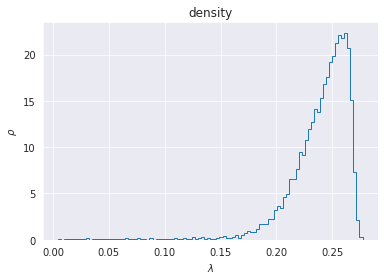

T=16


<Figure size 432x288 with 0 Axes>

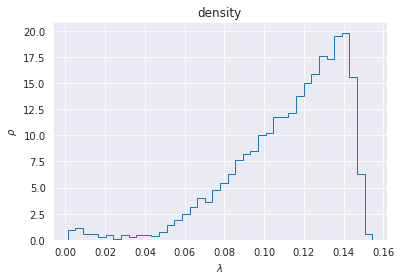

T=24


<Figure size 432x288 with 0 Axes>

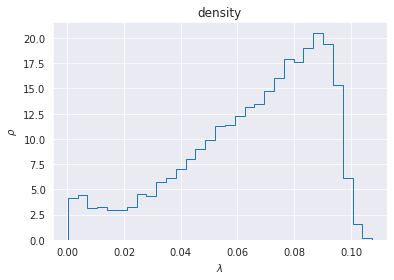

T=32


<Figure size 432x288 with 0 Axes>

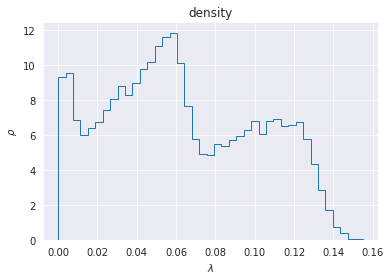

<Figure size 432x288 with 0 Axes>

In [108]:
plot_hist(0, eigs, param) # density of eigenvalues
plot_hist(1, eigs, param)
plot_hist(2, eigs, param)
plot_hist(3, eigs, param)

In [109]:
arr_spectral_window = [0]*4
arr_integral = [0]*4
print(len(arr_spectral_window))

4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
integral nan
variation 0.0


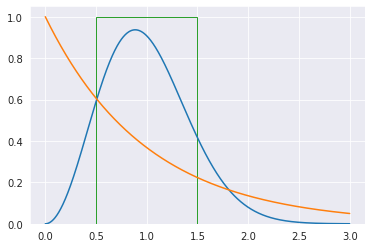

[5.592409767251802, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
integral 0.5296204883625902
variation 0.7993593101912981


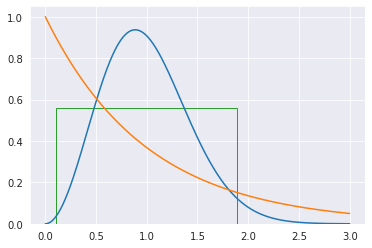

[12.046668126131463, 0.0, 0.0, 12.046668126131463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
integral 1.5121203505222214
variation 0.05912991383831945


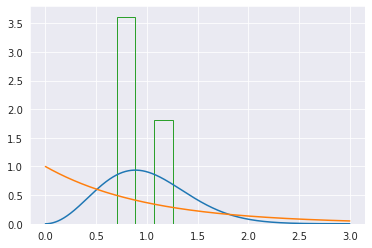

[0.8496450648707075, 0.2832150216235691, 1.1328600864942764, 0.8496450648707075, 0.8496450648707075, 0.0, 0.2832150216235691, 0.2832150216235691, 0.8496450648707075, 0.2832150216235691, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2832150216235691, 0.5664300432471382, 0.0, 0.0, 0.0]
integral 0.3387090228252555
variation 0.6442928495499142


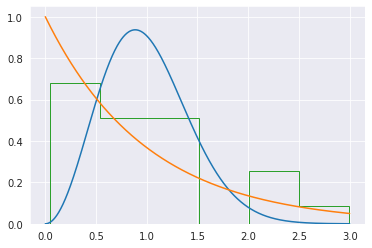

[0.9484751226643916, 0.9078261888359176, 0.7858793873504959, 0.5013368505511784, 0.352290759846774, 0.4606879167227045, 0.20324466914236963, 0.18969502453287831, 0.20324466914236963, 0.1354964460949131, 0.06774822304745655, 0.08129786765694785, 0.08129786765694785, 0.027099289218982615, 0.013549644609491308, 0.06774822304745655, 0.027099289218982615, 0.0, 0.013549644609491308, 0.0]
integral 0.3693526591470928
variation 0.531363602383377


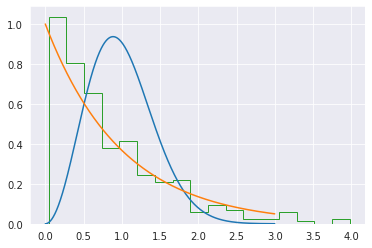

[0.46676475201750806, 0.973996403313066, 0.49746377905602873, 0.2337312285887372, 0.11233053075458713, 0.062095759237007796, 0.035582963158285366, 0.02721050123868881, 0.018838039319092253, 0.007674756759630177, 0.002790820639865519, 0.005581641279731038, 0.0034885257998318988, 0.002790820639865519, 0.0013954103199327595, 0.0, 0.0006977051599663797, 0.0006977051599663797, 0.0, 0.0]
integral 0.1914988151656499
variation 0.5460436321692896


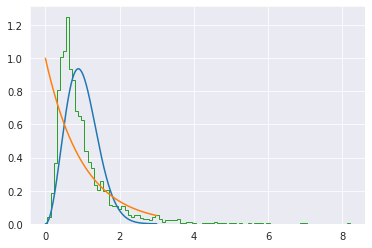

[0.029745017180171508, 0.13822684454314993, 0.4767951283292197, 0.9142218515670361, 1.1556814027943105, 0.9317189204965487, 0.692883929608701, 0.4269284818801087, 0.2125893874935787, 0.12860345663191797, 0.06648886193214806, 0.03586899130550093, 0.018371922375988285, 0.00699882757180506, 0.004374267232378163, 0.00699882757180506, 0.0008748534464756325, 0.001749706892951265, 0.0, 0.0026245603394268974]
integral 0.03200840088967158
variation 0.1647326707433524


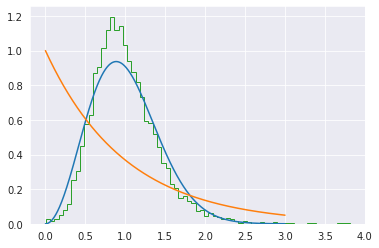

<Figure size 432x288 with 0 Axes>

In [140]:
m = 0
arr_spectral_window[m], arr_integral[m] = make_level_spacing(round(len(eigs[m][0])/7), eigs[m], m)

[0.1963343601409029, 0.3926687202818058, 1.5706748811272233, 0.9816718007045145, 0.1963343601409029, 0.5890030804227088, 0.5890030804227088, 0.3926687202818058, 0.1963343601409029, 0.7853374405636117, 0.1963343601409029, 0.0, 0.0, 0.1963343601409029, 0.1963343601409029, 0.0, 0.1963343601409029, 0.0, 0.0, 0.0]
integral 0.3214790641274858
variation 0.4482055326795551


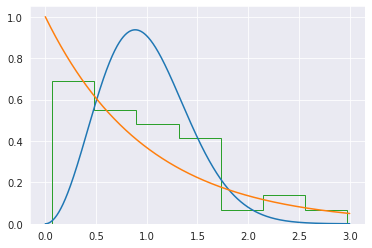

[29.574096120987416, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.574096120987416, 0.0, 0.0, 0.0]
integral 1.6097631127691234
variation 0.009628984803845109


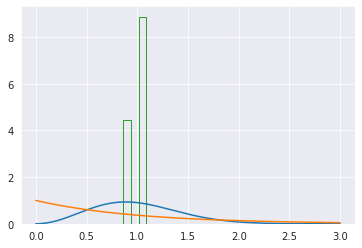

[0.8056692852451389, 0.0, 0.0, 2.4170078557354167, 0.40283464262256946, 0.40283464262256946, 0.40283464262256946, 0.0, 1.6113385704902778, 0.40283464262256946, 0.0, 0.40283464262256946, 0.40283464262256946, 0.0, 0.0, 0.40283464262256946, 0.0, 0.40283464262256946, 0.40283464262256946, 0.0]
integral 0.38046367393718195
variation 0.40227746601312986


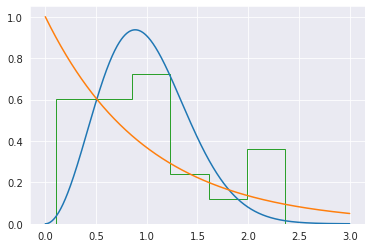

[0.2954575291612295, 0.6565722870249544, 0.9848584305374316, 0.9192012018349363, 0.5580864439712113, 0.6894009013762022, 0.39394337221497266, 0.19697168610748633, 0.1641430717562386, 0.42677198656622045, 0.1313144574049909, 0.1641430717562386, 0.06565722870249545, 0.032828614351247724, 0.032828614351247724, 0.06565722870249545, 0.032828614351247724, 0.0, 0.032828614351247724, 0.0]
integral 0.16424251200631262
variation 0.39392252550311235


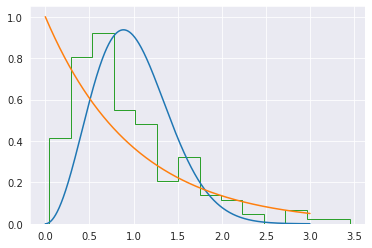

[0.25633432377674803, 0.7074827336238246, 0.9433103114984328, 0.8920434467430832, 0.7177361065748945, 0.3486146803363773, 0.3076011885320976, 0.19481408607032852, 0.16405396721711876, 0.061520237706419525, 0.020506745902139845, 0.061520237706419525, 0.010253372951069923, 0.020506745902139845, 0.0, 0.0, 0.0, 0.010253372951069923, 0.0, 0.0]
integral 0.20692314016359584
variation 0.29191614027552515


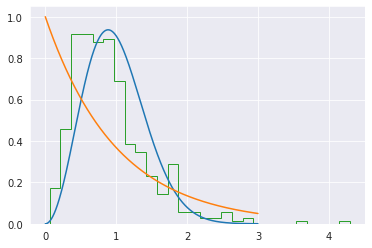

[0.18169005562641607, 0.8496682013117692, 1.0099829562762541, 0.8496682013117692, 0.6679781456853532, 0.4542251390660401, 0.30459803443252104, 0.20840918145383017, 0.10153267814417367, 0.09084502781320804, 0.06946972715127674, 0.016031475496448476, 0.03740677615837978, 0.005343825165482825, 0.0213753006619313, 0.016031475496448476, 0.0213753006619313, 0.005343825165482825, 0.0, 0.0]
integral 0.21528968368345325
variation 0.31517391889886204


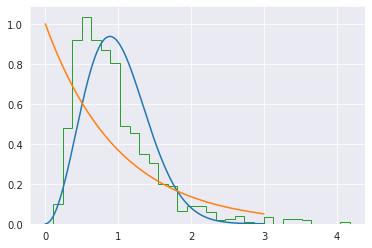

[0.23396712324827215, 0.8569045888967969, 0.9563406162773126, 0.7457702053538675, 0.5147276711461989, 0.25736383557309944, 0.1345310958677565, 0.11405897258353269, 0.023396712324827217, 0.03217047944663743, 0.020472123284223816, 0.01462294520301701, 0.002924589040603402, 0.0, 0.0, 0.002924589040603402, 0.0, 0.0, 0.0, 0.0]
integral 0.061276054479120885
variation 0.26403172466668845


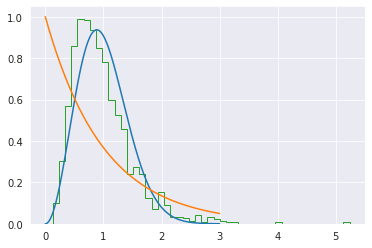

[0.07133969386156648, 0.21401908158469946, 0.5320752167175167, 1.0463155099696417, 0.948223430909988, 0.9155260712234365, 0.6034149105790833, 0.4339831376578628, 0.3121111606443534, 0.2021291326077717, 0.13673441323466912, 0.06836720661733456, 0.044587308663479056, 0.023779897953855496, 0.014862436221159684, 0.011889948976927748, 0.00891746173269581, 0.005944974488463874, 0.0, 0.005944974488463874]
integral 0.051246967373994416
variation 0.22236324571059873


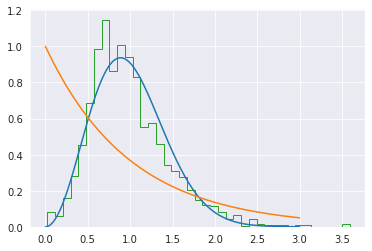

[0.045434300064738205, 0.097359214424439, 0.40890870058264384, 0.8243080154602502, 1.1553293445033428, 1.0644607443738665, 0.8502704726401006, 0.64906142949626, 0.5257397578919707, 0.31804010045316744, 0.1882278145539154, 0.1427935144891772, 0.08437798583451381, 0.0389436857697756, 0.045434300064738205, 0.032453071474813, 0.0194718428848878, 0.0064906142949626, 0.0, 0.0064906142949626]
integral 0.08547876421732034
variation 0.1825922110099828


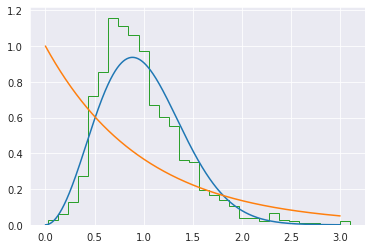

<Figure size 432x288 with 0 Axes>

In [133]:
m = 1
arr_spectral_window[m], arr_integral[m] = make_level_spacing(round(len(eigs[m][0])/5), eigs[m], m)

[0.2669697583626671, 0.8390478119969539, 1.2585717179954308, 0.686493664361144, 0.7055629328156202, 0.4576624429074293, 0.514870248270858, 0.4004546375440006, 0.2479004899081909, 0.1525541476358098, 0.19069268454476224, 0.1525541476358098, 0.11441561072685733, 0.05720780536342866, 0.13348487918133356, 0.0762770738179049, 0.019069268454476224, 0.019069268454476224, 0.0, 0.019069268454476224]
integral 0.3837274518870585
variation 0.3616553539469083


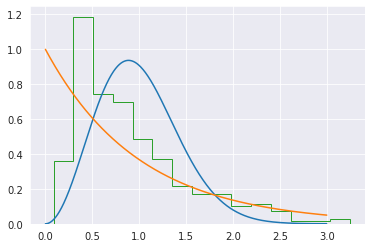

[0.29979597822155424, 0.9155931226766385, 0.8750801526466988, 0.834567182616759, 0.7940542125868193, 0.4699504523473012, 0.2349752261736506, 0.170154474125747, 0.17825706813173495, 0.170154474125747, 0.12964150409580724, 0.08912853406586747, 0.056718158041915656, 0.06482075204790362, 0.06482075204790362, 0.04051297002993976, 0.008102594005987953, 0.03241037602395181, 0.016205188011975905, 0.008102594005987953]
integral 0.2275857095758537
variation 0.42751806219213717


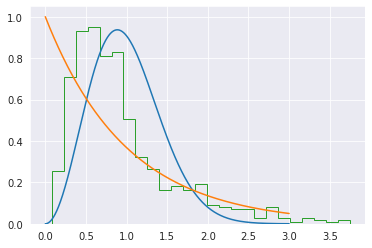

[0.3173842064823186, 0.8908094534881884, 1.0001603145451217, 0.7014457672676454, 0.42406797336713165, 0.29071326476111536, 0.23470428714658853, 0.16002565032721947, 0.08801410767997071, 0.06934444847512844, 0.03200513006544389, 0.04267350675392519, 0.0026670941721203246, 0.02400384754908292, 0.02400384754908292, 0.010668376688481298, 0.005334188344240649, 0.005334188344240649, 0.0, 0.0]
integral 0.2847896052859386
variation 0.3951631851581604


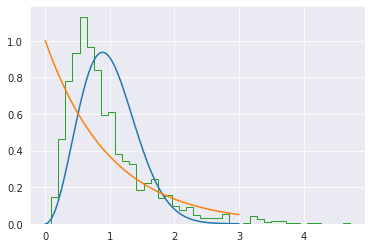

[0.10935170973394048, 0.5306774148852995, 0.9584355735504196, 0.8925029250343672, 0.5966100634013518, 0.3939877777178738, 0.2621224806857691, 0.15437888433026892, 0.09970302946329869, 0.06271642175917175, 0.046635287974768735, 0.019297360541283615, 0.01286490702752241, 0.014473020405962713, 0.008040566892201506, 0.0016081133784403012, 0.006432453513761205, 0.0016081133784403012, 0.0032162267568806024, 0.0016081133784403012]
integral 0.15323376335058553
variation 0.3352421329054851


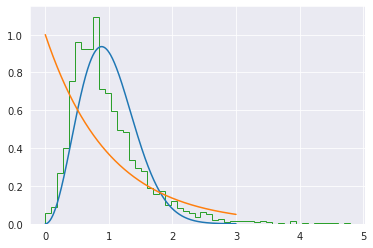

[0.05357157223878044, 0.23901162998840506, 0.6387379766931515, 0.9725300806424756, 0.894233167370412, 0.8818704968537703, 0.6016499651432266, 0.5274739420433766, 0.41620990739360186, 0.1895609479218385, 0.1854400577496246, 0.09065958378870537, 0.08653869361649148, 0.07829691327206373, 0.03296712137771104, 0.04532979189435268, 0.0206044508610694, 0.00412089017221388, 0.00824178034442776, 0.00412089017221388]
integral 0.048975853046118886
variation 0.2561260580178809


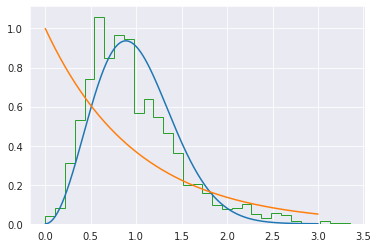

<Figure size 432x288 with 0 Axes>

In [135]:
m = 2
arr_spectral_window[m], arr_integral[m] = make_level_spacing(round(len(eigs[m][0])/5), eigs[m], m)

[0.37484958027637305, 1.0813842437063854, 0.9390171303892982, 0.6444383693236232, 0.461935846401187, 0.32638417999821573, 0.2309679232005935, 0.18023070728439755, 0.14463892895512576, 0.10374624747043051, 0.08784353800416014, 0.0636108378650815, 0.04392176900208007, 0.045436312760772486, 0.037863593967310406, 0.018931796983655203, 0.01741725322496279, 0.00832999067280829, 0.0030290875173848326, 0.0015145437586924163]
integral 0.30237202738108526
variation 0.45274653091672534


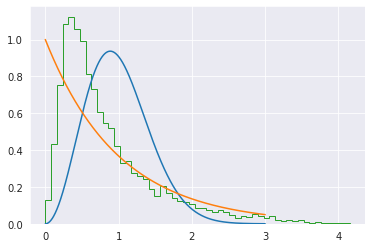

[0.7036140558060175, 1.2608590148178203, 0.7461783628856409, 0.4312893564292441, 0.2936068529165851, 0.18198412924859345, 0.1072794270272138, 0.08208830651070204, 0.05993749364273483, 0.03908966976700098, 0.026928439172822893, 0.016938856899033756, 0.014332878914567025, 0.009120922945633561, 0.006080615297089041, 0.003908966976700097, 0.003908966976700097, 0.002605977984466732, 0.0017373186563111544, 0.0004343296640777886]
integral 0.1762427271309888
variation 0.3702727430134706


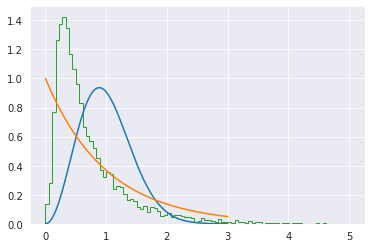

[0.3139338908128848, 0.7762728936464062, 0.8137818780032703, 0.6833158454576558, 0.4550002885028305, 0.28702527160035185, 0.18346785826727036, 0.12965061984220438, 0.10029576251944113, 0.06931007978985769, 0.04974017490801552, 0.03587815895004398, 0.02853944461935317, 0.01630825406820181, 0.006523301627280724, 0.007338714330690815, 0.0040770635170504525, 0.001630825406820181, 0.0040770635170504525, 0.0]
integral 0.07913909201611809
variation 0.4665352674484424


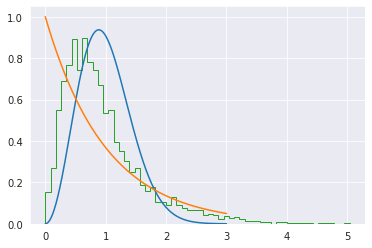

[0.14681561308340538, 0.8005842833095097, 0.9524192335923477, 0.7077265451200054, 0.42601624480184724, 0.24030076842283873, 0.15183495028283805, 0.10540608118808592, 0.07779972659120628, 0.0401546975954613, 0.025724103147092395, 0.016312845898156153, 0.011293508698723491, 0.005019337199432663, 0.0037645028995744972, 0.0018822514497872486, 0.0006274171499290828, 0.0018822514497872486, 0.0, 0.0006274171499290828]
integral 0.03954790235926237
variation 0.3554150664073974


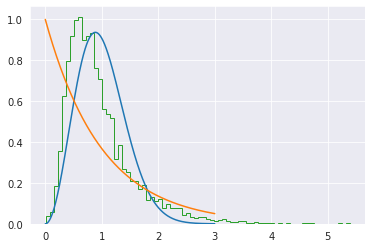

[0.19959379118461487, 0.8052577092620669, 0.9291435106870003, 0.6538417297427038, 0.5643686509358076, 0.2718605086824926, 0.18238742987559636, 0.11356198463952225, 0.08603180654509261, 0.04817781166525186, 0.044736539403448156, 0.017206361309018522, 0.010323816785411114, 0.0034412722618037046, 0.010323816785411114, 0.0, 0.0, 0.0, 0.0, 0.0]
integral 0.05122605835419147
variation 0.34598572913319636


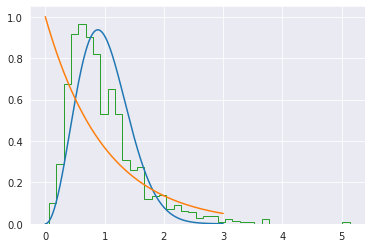

<Figure size 432x288 with 0 Axes>

In [142]:
m = 3
arr_spectral_window[m], arr_integral[m] = make_level_spacing(round(len(eigs[m][0])/3), eigs[m], m)

In [114]:
print(arr_spectral_window[1])
print(arr_integral[0])

[0.0011889001053534895, 0.018372299686423732, 0.035555699267493975, 0.05273909884856422, 0.06992249842963447, 0.0871058980107047, 0.10428929759177494, 0.1214726971728452, 0.13865609675391544]
0


In [115]:
def plot_integral(arr_spectral_window, arr_integral, param):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.set_xlabel(r"$\lambda$")
    ax.set_ylabel("I")
    ax.set_title("integral")
    l = []
    m = []
    for i in range(4):
        l1 = ax.errorbar(arr_spectral_window[i], arr_integral[i], fmt = '-o')
        m.append("T=%d" % (param[i]))
        l.append(l1)
    print(m)
    plt.legend(l, m, loc='best')
    plt.show()
    plt.clf()

['T=8', 'T=16', 'T=24', 'T=32']


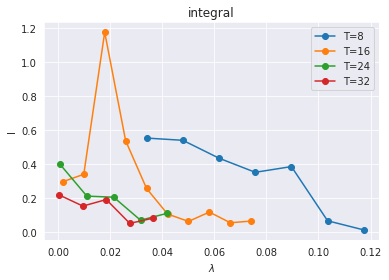

<Figure size 432x288 with 0 Axes>

In [274]:
plot_integral(arr_spectral_window, arr_integral, param)
#plt.plot(arr_spectral_window[i], arr_integral[i], '-o')
#plt.show()
#plt.clf()

7.501782116216783
2.7480990146243287
0.9571638999776148
0.45959417147654236


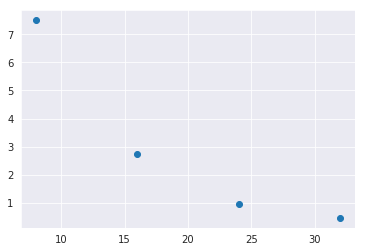

In [206]:
N_T = [8, 16, 24, 32]
arr_var = []
for i in range(4):
    print(get_var(eigs[i]))
    arr_var.append(get_var(eigs[i]))
plt.plot(N_T, arr_var, 'o')

In [269]:
def build_plot_var(arr_eig, arr_var, param):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)
    ax.set_xlabel(r"$\lambda$")
    ax.set_ylabel("var")
    l = []
    m = []
    #m = "T=%d" % (42)
    for i in range(len(arr_eig)):
        l1 = ax.errorbar(arr_eig[i], arr_var[i], fmt='-o')
        m.append("T=%d" % (param[i]))
        l.append(l1)
    ax.set_title("variance")
    plt.legend(l, m, loc='best')
    #plt.savefig(file_out, dpi=800, bbox_inches = 'tight', pad_inches = 0)
    plt.show()

8
10
5
5


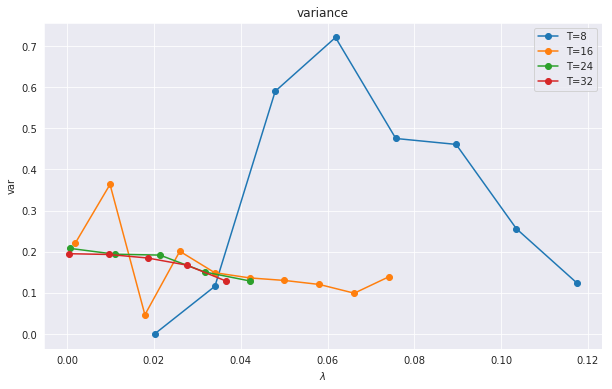

In [270]:
arr_eig = []
arr_var = []
for m in range(4):
    arr_eig.append([])
    arr_var.append([])
    N = round(len(eigs[m][0])/5)
    print(N)
    min_x, max_x = min_and_max(eigs[m])
    delta = (max_x - min_x)/N
    for i in range(N):
        n = divide_spectrum(eigs[m], min_x + i*delta, min_x + (i+1)*delta)
        arr_var[m].append(get_var(n))
        arr_eig[m].append(min_x + i*delta)
build_plot_var(arr_eig, arr_var, param)